# Gráficas Rendija Doble-Láser

Parámetros ajustados (I, A, B, C): [1.70158993e+00 6.64092169e-04 4.28095151e-03 3.48723260e-02]
Incertidumbres (I, A, B, C): [8.19934576e-03 3.60315710e-06 2.88622849e-06 6.47607926e-03]
Longitud de onda (A): 0.47307 ± 0.00257


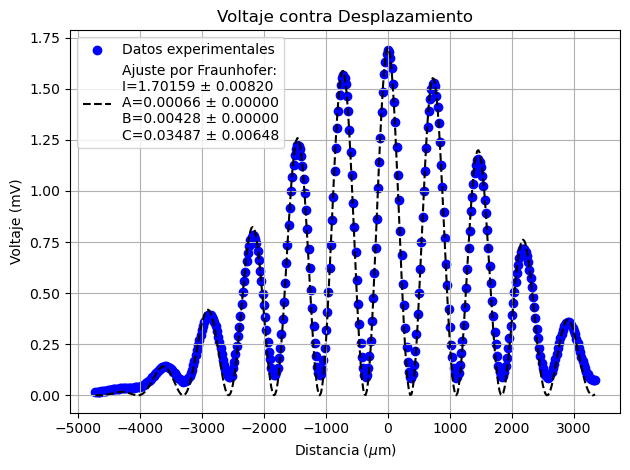

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Leer datos desde archivo Excel
dat= pd.read_excel('C:/Programación/Lab Intermedio/Doble rendija/Rendija_laser.xlsx')
datos=pd.DataFrame(dat,columns=["Voltaje (V)", "Desplazamiento (micrómetro)"])
#print(datos) #335
ydata=datos["Voltaje (V)"].astype(float)
xdata=datos["Desplazamiento (micrómetro)"].astype(float)


u = (xdata) - 4720  # Centrado de los datos en x

# Parámetros experimentales

# Definición de la función sinc modificada
def sinc(x, I, A, B, C):
    return I * np.cos(B * x) ** 2 * ((np.sin(A * x + C)) / (A * x + C)) ** 2

# Valores iniciales para el ajuste
guess = [140, np.pi / 360, np.pi / 360, 1]

# Ajuste de la curva
parameters, covariance = curve_fit(sinc, u, ydata, p0=guess, maxfev=50000)

a=0.1/1000
fit_I, fit_A, fit_B, fit_C = parameters
uncertainties = np.sqrt(np.diag(covariance)) if covariance is not None else [np.nan] * len(parameters)
I_err, A_err, B_err, C_err = uncertainties

# Generación de datos ajustados y residuales
x = np.linspace(0, 6640, 500)
res = ydata - sinc(u, fit_I, fit_A, fit_B, fit_C)

# Gráficas
fig, ax = plt.subplots(1, 1)

# Gráfico 1: Datos experimentales y ajuste
ax.scatter(u, ydata, label='Datos experimentales', color='blue')
ax.plot(u, sinc(u, fit_I, fit_A, fit_B, fit_C), linestyle="--", color="k", 
           label=(
               f'Ajuste por Fraunhofer:\n'
               f'I={fit_I:.5f} ± {I_err:.5f}\n'
               f'A={fit_A:.5f} ± {A_err:.5f}\n'
               f'B={fit_B:.5f} ± {B_err:.5f}\n'
               f'C={fit_C:.5f} ± {C_err:.5f}'
           ))
ax.set_xlabel("Distancia ($\mu$m)")
ax.set_ylabel("Voltaje (mV)")
ax.grid()
ax.set_title("Voltaje contra Desplazamiento")
ax.legend(loc="upper left")

# Calcular y mostrar longitud de onda
lambda_A = np.pi * a / fit_A
lambda_A_err = np.sqrt(np.pi**2 * a**2 / (fit_A**4) * covariance[1][1])

print(f"Parámetros ajustados (I, A, B, C): {parameters}")
print(f"Incertidumbres (I, A, B, C): {uncertainties}")
print(f"Longitud de onda (A): {lambda_A:.5f} ± {lambda_A_err:.5f}")


# Gráfico 2: Residuales

plt.tight_layout()
plt.show()


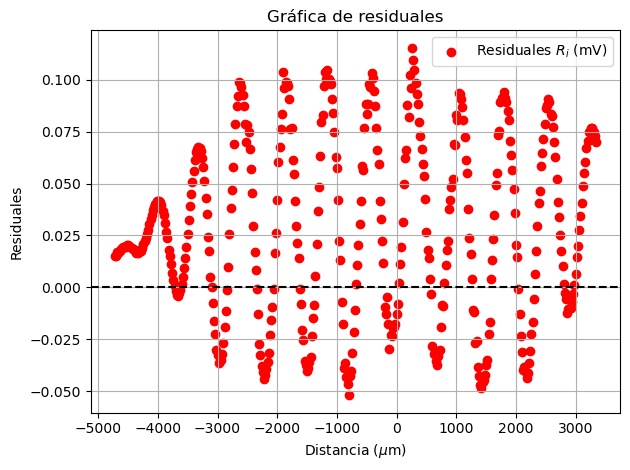

In [47]:
fig, ax = plt.subplots(1, 1)
ax.scatter(u, res, color="red", label='Residuales $R_i$ (mV)')
ax.axhline(0, color="black", linestyle="--")
ax.set_xlabel("Distancia ($\mu$m)")
ax.set_ylabel("Residuales")
ax.grid()
ax.set_title("Gráfica de residuales")
ax.legend()

plt.tight_layout()
plt.show()